In [76]:
import os
import glob

import pandas as pd
import seaborn as sns
from python_pdb.parsers import parse_pdb

In [3]:
DATA_DIR = '/project/koohylab/bmcmaste/projects/tcr-loop-comparison/data/apo-holo-mhc-class-I_refined'

In [86]:
df = pd.DataFrame({'path': glob.glob('**/*.pdb', root_dir=DATA_DIR, recursive=True)})
df

,path
0,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
1,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...
2,NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQR...
3,NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQR...
4,DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHE...
...,...
70,DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGT...
71,NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-ASSL...
72,NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-ASSL...
73,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...


In [87]:
df['tcr_group'] = df['path'].map(lambda path: path.split('/')[0])
df['state'] = df['path'].map(lambda path: path.split('_')[-1].split('.')[0])

chains = df['path'].map(lambda path: path.split('_')[-2])
df[['alpha_chain', 'beta_chain', 'antigen_chain', 'mhc_chain']] = chains.apply(list).apply(pd.Series)
df

,path,tcr_group,state,alpha_chain,beta_chain,antigen_chain,mhc_chain
0,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,apo,D,E,NaN,NaN
1,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,holo,D,E,C,A
2,NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQR...,NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQR...,apo,A,B,NaN,NaN
3,NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQR...,NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQR...,holo,A,B,P,H
4,DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHE...,DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY,apo,A,B,NaN,NaN
...,...,...,...,...,...,...,...
70,DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGT...,DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGTEAF,holo,D,E,C,A
71,NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-ASSL...,NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-ASSL...,holo,E,F,P,A
72,NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-ASSL...,NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-ASSL...,apo,A,B,NaN,NaN
73,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...,DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGT...,apo,A,B,NaN,NaN


In [55]:
holo_structures = df.query("state == 'holo'")
holo_structures

,path,tcr_group,state,alpha_chain,beta_chain,antigen_chain,mhc_chain
1,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGA...,holo,D,E,C,A
3,NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQR...,NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQR...,holo,A,B,P,H
5,DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHE...,DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY,holo,D,E,C,A
6,DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHE...,DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY,holo,D,E,C,A
8,NSASQS-VYSSG-VVQPGGYQKVT-MNHNS-SASEGT-ASSEGLWQ...,NSASQS-VYSSG-VVQPGGYQKVT-MNHNS-SASEGT-ASSEGLWQ...,holo,D,E,P,A
9,YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGG...,YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY,holo,A,B,P,H
10,YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGG...,YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY,holo,C,D,Q,I
11,YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGG...,YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY,holo,A,B,P,H
12,YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGG...,YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY,holo,B,C,Q,A
14,DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVS...,DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVS...,holo,D,E,C,A


In [79]:
A1 = range(1, 14 + 1)
B1 = range(18, 28 + 1)
C1 = range(31, 38 + 1)
A2 = range(1001, 1014 + 1)
B2 = range(1018, 1028 + 1)
C2 = range(1031, 1038 + 1)
D2 = range(1042, 1049 + 1)

def compute_mhc_floor_lengths(path, mhc_chain):
    def _length(df):
        return len(df.drop_duplicates(['chain_id', 'residue_seq_id', 'residue_insert_code']))
    
    with open(os.path.join(DATA_DIR, path), 'r') as fh:
        structure = parse_pdb(fh.read()).to_pandas()
    
    mhc = structure.query("record_type == 'ATOM' and chain_id == @mhc_chain")
    return (_length(mhc.query("residue_seq_id in @A1")),
            _length(mhc.query("residue_seq_id in @B1")),
            _length(mhc.query("residue_seq_id in @C1")),
            _length(mhc.query("residue_seq_id in @A2")),
            _length(mhc.query("residue_seq_id in @B2")),
            _length(mhc.query("residue_seq_id in @C2")),
            _length(mhc.query("residue_seq_id in @D2")))

lengths = holo_structures[['path', 'mhc_chain']].apply(lambda x: compute_mhc_floor_lengths(x.path, x.mhc_chain), axis=1)
lengths = lengths.apply(pd.Series)
lengths.columns = ['mhc_A1_length', 'mhc_B1_length', 'mhc_C1_length', 'mhc_A2_length', 'mhc_B2_length', 'mhc_C2_length', 'mhc_D2_length']

/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=959, atom_name='CA', alt_loc='A', res_name='ARG', chain_id='B', seq_id=123, insert_code=None, x_pos=-120.455, y_pos=-16.302, z_pos=109.133, occupancy=0.55, b_factor=23.3, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=962, atom_name='CB', alt_loc='A', res_name='ARG', chain_id='B', seq_id=123, insert_code=None, x_pos=-121.936, y_pos=-16.426, z_pos=109.542, occupancy=0.55, b_factor=26.46, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warn

/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=163, atom_name='N', alt_loc='A', res_name='THR', chain_id='E', seq_id=13, insert_code=None, x_pos=19.416, y_pos=-15.345, z_pos=17.709, occupancy=0.5, b_factor=58.38, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=164, atom_name='CA', alt_loc='A', res_name='THR', chain_id='E', seq_id=13, insert_code=None, x_pos=20.487, y_pos=-16.349, z_pos=17.732, occupancy=0.5, b_factor=58.45, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn(

/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1262, atom_name='N', alt_loc='A', res_name='HIS', chain_id='E', seq_id=167, insert_code=None, x_pos=12.272, y_pos=13.171, z_pos=36.266, occupancy=0.5, b_factor=42.36, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1263, atom_name='CA', alt_loc='A', res_name='HIS', chain_id='E', seq_id=167, insert_code=None, x_pos=13.447, y_pos=13.934, z_pos=36.436, occupancy=0.5, b_factor=43.42, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.war

/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1, atom_name='N', alt_loc='A', res_name='ALA', chain_id='C', seq_id=2, insert_code=None, x_pos=48.681, y_pos=-11.013, z_pos=29.6, occupancy=0.5, b_factor=30.86, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=2, atom_name='CA', alt_loc='A', res_name='ALA', chain_id='C', seq_id=2, insert_code=None, x_pos=49.343, y_pos=-9.708, z_pos=29.33, occupancy=0.5, b_factor=29.82, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record

/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=4462, atom_name='CA', alt_loc='A', res_name='SER', chain_id='J', seq_id=108, insert_code=None, x_pos=88.98, y_pos=21.545, z_pos=-8.465, occupancy=0.5, b_factor=7.01, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=4465, atom_name='CB', alt_loc='A', res_name='SER', chain_id='J', seq_id=108, insert_code=None, x_pos=89.154, y_pos=20.02, z_pos=-8.384, occupancy=0.5, b_factor=9.1, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f

/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=3814, atom_name='CB', alt_loc='A', res_name='ASP', chain_id='A', seq_id=30, insert_code=None, x_pos=40.776, y_pos=-12.987, z_pos=20.572, occupancy=0.5, b_factor=53.07, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=3815, atom_name='CG', alt_loc='A', res_name='ASP', chain_id='A', seq_id=30, insert_code=None, x_pos=40.051, y_pos=-11.67, z_pos=20.833, occupancy=0.5, b_factor=52.11, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.war

/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1389, atom_name='N', alt_loc='A', res_name='CYS', chain_id='E', seq_id=184, insert_code=None, x_pos=-10.668, y_pos=9.984, z_pos=-12.093, occupancy=0.5, b_factor=19.77, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1390, atom_name='CA', alt_loc='A', res_name='CYS', chain_id='E', seq_id=184, insert_code=None, x_pos=-11.63, y_pos=10.791, z_pos=-11.279, occupancy=0.5, b_factor=20.28, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.w

In [81]:
lengths

,mhc_A1_length,mhc_B1_length,mhc_C1_length,mhc_A2_length,mhc_B2_length,mhc_C2_length,mhc_D2_length
1,14,11,8,14,11,8,8
3,14,11,8,14,11,8,8
5,14,11,8,14,11,8,8
6,14,11,8,14,11,8,8
8,13,11,8,14,11,8,8
9,14,11,8,14,11,8,8
10,14,11,8,14,11,8,8
11,14,11,8,14,11,8,8
12,14,11,8,14,11,8,8
14,14,11,8,14,11,8,8


In [89]:
df = df.join(lengths, how='outer')

<Axes: xlabel='mhc_A1_length', ylabel='Count'>

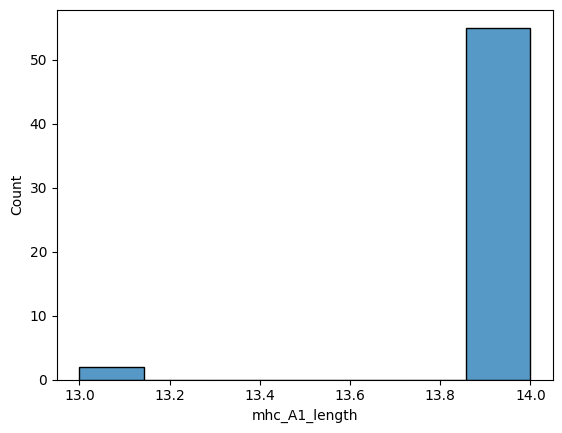

In [90]:
sns.histplot(df, x='mhc_A1_length')

In [91]:
def compute_variable_lengths(path, alpha_chain, beta_chain):
    def _length(df):
        return len(df.drop_duplicates(['chain_id', 'residue_seq_id', 'residue_insert_code']))
    
    print(path)
    with open(os.path.join(DATA_DIR, path), 'r') as fh:
        structure = parse_pdb(fh.read()).to_pandas()
    
    alpha_variable_chain = structure.query("record_type == 'ATOM' and chain_id == @alpha_chain and residue_seq_id < 128")
    beta_variable_chain = structure.query("record_type == 'ATOM' and chain_id == @beta_chain and residue_seq_id < 128")
    return pd.Series((_length(alpha_variable_chain), _length(beta_variable_chain)), index=['valpha_length', 'vbeta_length'])

lengths = df[['path', 'alpha_chain', 'beta_chain']].apply(lambda x: compute_variable_lengths(x.path, x.alpha_chain, x.beta_chain), axis=1)
lengths


YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGAGGADTQY/7n1c_DE_apo.pdb
YSGSPE-HISR-ALSGFNNAGNMLT-SGHAT-FQNNGV-ASSLGGAGGADTQY/7n1e_DECA_holo.pdb
NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQRQEGDTQY/6at6_AB_apo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=867, atom_name='CA', alt_loc='A', res_name='ARG', chain_id='B', seq_id=123, insert_code=None, x_pos=-35.553, y_pos=-1.781, z_pos=27.255, occupancy=0.98, b_factor=9.12, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=870, atom_name='CB', alt_loc='A', res_name='ARG', chain_id='B', seq_id=123, insert_code=None, x_pos=-36.421, y_pos=-1.405, z_pos=28.457, occupancy=0.98, b_factor=12.3, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.wa

NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQRQEGDTQY/6avf_ABPH_holo.pdb
DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY/3vxt_AB_apo.pdb
DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY/3vxu_DECA_holo.pdb
DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY/3w0w_DECA_holo.pdb
NSASQS-VYSSG-VVQPGGYQKVT-MNHNS-SASEGT-ASSEGLWQVGDEQY/6vth_DE_apo.pdb
NSASQS-VYSSG-VVQPGGYQKVT-MNHNS-SASEGT-ASSEGLWQVGDEQY/6vrm_DEPA_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/1g6r_ABPH_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/2ckb_CDQI_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/1mwa_ABPH_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/2oi9_BCQA_holo.pdb
YSATPY-YYSGDPVV-AVSGFASALT-NNHNN-SYGAGS-ASGGGGTLY/1tcr_AB_apo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nmf_DECA_holo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nmd_AB_apo.pdb
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nmg_DECA_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1334, atom_name='N', alt_loc='A', res_name='CYS', chain_id='B', seq_id=184, insert_code=None, x_pos=28.455, y_pos=3.985, z_pos=20.385, occupancy=0.5, b_factor=35.76, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1335, atom_name='CA', alt_loc='A', res_name='CYS', chain_id='B', seq_id=184, insert_code=None, x_pos=29.636, y_pos=4.049, z_pos=21.214, occupancy=0.5, b_factor=37.38, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn(

DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY/5nme_IJHF_holo.pdb
DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY/7n1f_DECA_holo.pdb
DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY/7rtr_DECA_holo.pdb
DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY/7n1d_AB_apo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=163, atom_name='N', alt_loc='A', res_name='THR', chain_id='E', seq_id=13, insert_code=None, x_pos=19.416, y_pos=-15.345, z_pos=17.709, occupancy=0.5, b_factor=58.38, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=164, atom_name='CA', alt_loc='A', res_name='THR', chain_id='E', seq_id=13, insert_code=None, x_pos=20.487, y_pos=-16.349, z_pos=17.732, occupancy=0.5, b_factor=58.45, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn(

FLGSQS-TYREGD-AVNDGGRLT-GTSNPN-WGPFG-AWSETGLGMGGWQ/4jff_DECA_holo.pdb
FLGSQS-TYREGD-AVNDGGRLT-GTSNPN-WGPFG-AWSETGLGMGGWQ/4jfe_DECA_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1262, atom_name='N', alt_loc='A', res_name='HIS', chain_id='E', seq_id=167, insert_code=None, x_pos=12.272, y_pos=13.171, z_pos=36.266, occupancy=0.5, b_factor=42.36, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1263, atom_name='CA', alt_loc='A', res_name='HIS', chain_id='E', seq_id=167, insert_code=None, x_pos=13.447, y_pos=13.934, z_pos=36.436, occupancy=0.5, b_factor=43.42, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.war

FLGSQS-TYREGD-AVNDGGRLT-GTSNPN-WGPFG-AWSETGLGMGGWQ/6eqb_DECA_holo.pdb
FLGSQS-TYREGD-AVNDGGRLT-GTSNPN-WGPFG-AWSETGLGMGGWQ/6tmo_DECA_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=1, atom_name='N', alt_loc='A', res_name='ALA', chain_id='C', seq_id=2, insert_code=None, x_pos=48.681, y_pos=-11.013, z_pos=29.6, occupancy=0.5, b_factor=30.86, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=2, atom_name='CA', alt_loc='A', res_name='ALA', chain_id='C', seq_id=2, insert_code=None, x_pos=49.343, y_pos=-9.708, z_pos=29.33, occupancy=0.5, b_factor=29.82, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record

FLGSQS-TYREGD-AVNDGGRLT-GTSNPN-WGPFG-AWSETGLGMGGWQ/4jfd_DECA_holo.pdb
FLGSQS-TYREGD-AVNDGGRLT-GTSNPN-WGPFG-AWSETGLGMGGWQ/4jfh_DE_apo.pdb
SVFSS-VVTGGEV-AGAGSQGNLI-LNHDA-SQIVND-ASSSRSSYEQY/5hhm_IJHF_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=4462, atom_name='CA', alt_loc='A', res_name='SER', chain_id='J', seq_id=108, insert_code=None, x_pos=88.98, y_pos=21.545, z_pos=-8.465, occupancy=0.5, b_factor=7.01, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=4465, atom_name='CB', alt_loc='A', res_name='SER', chain_id='J', seq_id=108, insert_code=None, x_pos=89.154, y_pos=20.02, z_pos=-8.384, occupancy=0.5, b_factor=9.1, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f

SVFSS-VVTGGEV-AGAGSQGNLI-LNHDA-SQIVND-ASSSRSSYEQY/2vlm_DE_apo.pdb
SVFSS-VVTGGEV-AGAGSQGNLI-LNHDA-SQIVND-ASSSRSSYEQY/1oga_DECA_holo.pdb
SVFSS-VVTGGEV-AGAGSQGNLI-LNHDA-SQIVND-ASSSRSSYEQY/2vlj_DECA_holo.pdb
SVFSS-VVTGGEV-AGAGSQGNLI-LNHDA-SQIVND-ASSSRSSYEQY/2vlk_DECA_holo.pdb
NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/5c0b_IJHF_holo.pdb
NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/5hyj_DECA_holo.pdb
NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/3utt_DECA_holo.pdb
NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/5c08_DECA_holo.pdb
NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/5c0a_DECA_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=7933, atom_name='N', alt_loc='B', res_name='ARG', chain_id='A', seq_id=82, insert_code=None, x_pos=24.065, y_pos=-5.876, z_pos=-15.623, occupancy=0.51, b_factor=32.65, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=7934, atom_name='CA', alt_loc='B', res_name='ARG', chain_id='A', seq_id=82, insert_code=None, x_pos=24.425, y_pos=-7.276, z_pos=-15.807, occupancy=0.51, b_factor=36.07, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.w

NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/5c0c_DEHF_holo.pdb
NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/3utp_DE_apo.pdb
NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/5c07_DECA_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=345, atom_name='N', alt_loc='A', res_name='ARG', chain_id='E', seq_id=22, insert_code=None, x_pos=9.223, y_pos=-10.732, z_pos=60.575, occupancy=0.5, b_factor=23.54, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=346, atom_name='CA', alt_loc='A', res_name='ARG', chain_id='E', seq_id=22, insert_code=None, x_pos=10.252, y_pos=-11.485, z_pos=61.277, occupancy=0.5, b_factor=24.38, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((

NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/5c09_IJHF_holo.pdb
NSAFQY-TYSSGN-AMRGDSSYKLI-SGHDY-FNNNVP-ASSLWEKLAKNIQY/3uts_DECA_holo.pdb
DSAIYN-IQSSQRE-AVRMDSSYKLI-SEHNR-FQNEAQ-ASSSWDTGELF/3vxq_DE_apo.pdb
DSAIYN-IQSSQRE-AVRMDSSYKLI-SEHNR-FQNEAQ-ASSSWDTGELF/3vxr_DECA_holo.pdb
DSAIYN-IQSSQRE-AVRMDSSYKLI-SEHNR-FQNEAQ-ASSSWDTGELF/3vxs_DECA_holo.pdb
TISGTDY-GLTSN-ILPLAGGTSYGKLT-SGHVS-FQNEAQ-ASSLGQAYEQY/3kps_DECA_holo.pdb
TISGTDY-GLTSN-ILPLAGGTSYGKLT-SGHVS-FQNEAQ-ASSLGQAYEQY/3kpr_DECA_holo.pdb
TISGTDY-GLTSN-ILPLAGGTSYGKLT-SGHVS-FQNEAQ-ASSLGQAYEQY/1mi5_DECA_holo.pdb
TISGTDY-GLTSN-ILPLAGGTSYGKLT-SGHVS-FQNEAQ-ASSLGQAYEQY/1kgc_DE_apo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/3d3v_DECA_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=3814, atom_name='CB', alt_loc='A', res_name='ASP', chain_id='A', seq_id=30, insert_code=None, x_pos=40.776, y_pos=-12.987, z_pos=20.572, occupancy=0.5, b_factor=53.07, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=3815, atom_name='CG', alt_loc='A', res_name='ASP', chain_id='A', seq_id=30, insert_code=None, x_pos=40.051, y_pos=-11.67, z_pos=20.833, occupancy=0.5, b_factor=52.11, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.war

DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/3pwp_DECA_holo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/1qse_DECA_holo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/7amp_AB_apo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/1ao7_DECA_holo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/3qfj_DECA_holo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/3d39_DECA_holo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/3h9s_DECA_holo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/1qrn_DECA_holo.pdb
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY/1qsf_DECA_holo.pdb
DSAIYN-IQSSQRE-AVRPTSGGSYIPT-MNHEY-SVGAGI-ASSYVGNTGELF/2bnu_AB_apo.pdb
DSAIYN-IQSSQRE-AVRPTSGGSYIPT-MNHEY-SVGAGI-ASSYVGNTGELF/2f54_DECA_holo.pdb
DSAIYN-IQSSQRE-AVRPTSGGSYIPT-MNHEY-SVGAGI-ASSYVGNTGELF/6q3s_DECA_holo.pdb
DSAIYN-IQSSQRE-AVRPTSGGSYIPT-MNHEY-SVGAGI-ASSYVGNTGELF/2bnq_DECA_holo.pdb
DSAIYN-IQSSQRE-AVRPTSGGSYIPT-MNHEY-SVGAGI-ASSYVGNTGEL

/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=3497, atom_name='N', alt_loc='A', res_name='ASN', chain_id='A', seq_id=207, insert_code=None, x_pos=-8.451, y_pos=-13.485, z_pos=40.599, occupancy=0.5, b_factor=41.38, element='N', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=3498, atom_name='CA', alt_loc='A', res_name='ASN', chain_id='A', seq_id=207, insert_code=None, x_pos=-9.575, y_pos=-12.867, z_pos=39.893, occupancy=0.5, b_factor=39.65, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.w

DSAIYN-IQSSQRE-AVRPLLDGTYIPT-MNHEY-SVGAGT-ASSYLGNTGELF/2pye_DECA_holo.pdb
DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGTEAF/6am5_DECA_holo.pdb
DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGTEAF/6amu_DECA_holo.pdb
DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGTEAF/3qdj_DECA_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=3618, atom_name='CA', alt_loc='A', res_name='ARG', chain_id='A', seq_id=14, insert_code=None, x_pos=33.789, y_pos=0.467, z_pos=85.867, occupancy=0.5, b_factor=64.23, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=3621, atom_name='CB', alt_loc='A', res_name='ARG', chain_id='A', seq_id=14, insert_code=None, x_pos=33.848, y_pos=-0.861, z_pos=85.051, occupancy=0.5, b_factor=64.72, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn(

DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGTEAF/3qeu_DE_apo.pdb
DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGTEAF/3qdg_DECA_holo.pdb


/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=4999, atom_name='CA', alt_loc='A', res_name='ARG', chain_id='A', seq_id=1091, insert_code=None, x_pos=54.85, y_pos=7.392, z_pos=51.199, occupancy=0.5, b_factor=78.12, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((f'{record}: ATOM contains alternate location. '
/home/b/bmcmaste/.local/lib/python3.11/site-packages/python_pdb/entities.py:509: StructureConstructionWarning: AtomRecord(atom_num=5002, atom_name='CB', alt_loc='A', res_name='ARG', chain_id='A', seq_id=1091, insert_code=None, x_pos=54.016, y_pos=6.1, z_pos=50.992, occupancy=0.5, b_factor=76.3, element='C', charge=None): ATOM contains alternate location. The `split_states` method can be used to separate these possible conformations into separate models.
  warnings.warn((

NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-ASSLGHTEVF/5ivx_EFPA_holo.pdb
NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-ASSLGHTEVF/5iw1_AB_apo.pdb
DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGTGINYGYT/7r7z_AB_apo.pdb
DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGTGINYGYT/7r80_ABEC_holo.pdb


,valpha_length,vbeta_length
0,109,114
1,109,114
2,111,111
3,111,112
4,108,111
...,...,...
70,108,112
71,112,110
72,112,108
73,111,113


In [94]:
df = df.join(lengths, how='outer')

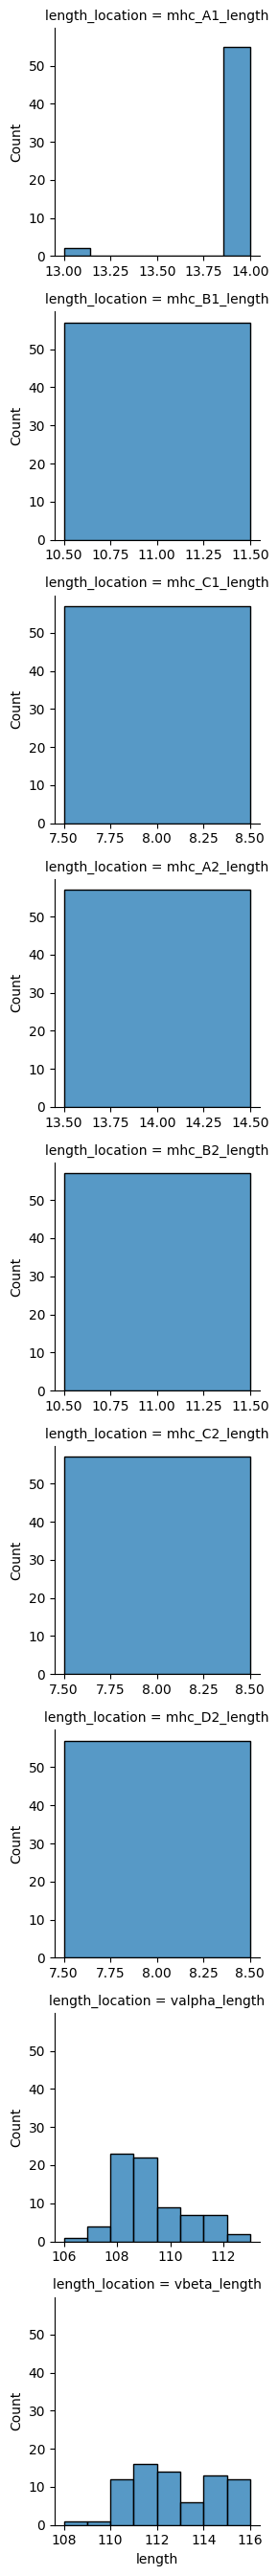

In [107]:
all_lengths = df.melt(id_vars=['tcr_group'], value_vars=['mhc_A1_length',
                    'mhc_B1_length',
                    'mhc_C1_length',
                    'mhc_A2_length',
                    'mhc_B2_length',
                    'mhc_C2_length',
                    'mhc_D2_length',
                    'valpha_length',
                    'vbeta_length'], var_name='length_location', value_name='length')

g = sns.FacetGrid(all_lengths, row='length_location', sharex=False)
g.map(sns.histplot, 'length')

tcr_group
DRGSQS-IYSNGD-AVNFGGGKLI-MRHNA-SNTAGT-ASSLSFGTEAF         Axes(0.125,0.11;0.775x0.77)
DRGSQS-IYSNGD-AVNRDDKII-SEHNR-FQNEAQ-ASSPDIEQY            Axes(0.125,0.11;0.775x0.77)
DRGSQS-IYSNGD-AVRTNSGYALN-QGHDT-YYEEEE-ASSDTVSYEQY        Axes(0.125,0.11;0.775x0.77)
DRGSQS-IYSNGD-AVTTDSWGKLQ-MNHEY-SVGAGI-ASRPGLAGGRPEQY     Axes(0.125,0.11;0.775x0.77)
DRGSQS-IYSNGD-GTYNQGGKLI-MNHEY-SMNVEV-ASSGASHEQY          Axes(0.125,0.11;0.775x0.77)
DSAIYN-IQSSQRE-AQLNQAGTALI-MNHEY-SVGAGI-ASSYGTGINYGYT     Axes(0.125,0.11;0.775x0.77)
DSAIYN-IQSSQRE-AVRMDSSYKLI-SEHNR-FQNEAQ-ASSSWDTGELF       Axes(0.125,0.11;0.775x0.77)
DSAIYN-IQSSQRE-AVRPLLDGTYIPT-MNHEY-SVGAGT-ASSYLGNTGELF    Axes(0.125,0.11;0.775x0.77)
DSAIYN-IQSSQRE-AVRPTSGGSYIPT-MNHEY-SVGAGI-ASSYVGNTGELF    Axes(0.125,0.11;0.775x0.77)
FLGSQS-TYREGD-AVNDGGRLT-GTSNPN-WGPFG-AWSETGLGMGGWQ        Axes(0.125,0.11;0.775x0.77)
NIATNDY-GYKTK-LVGEILDNFNKFY-MDHEN-SYDVKM-ASSQRQEGDTQY     Axes(0.125,0.11;0.775x0.77)
NSAFDY-ILSVSNK-AASASFGDNSKLI-MSHET-SYDVDS-AS

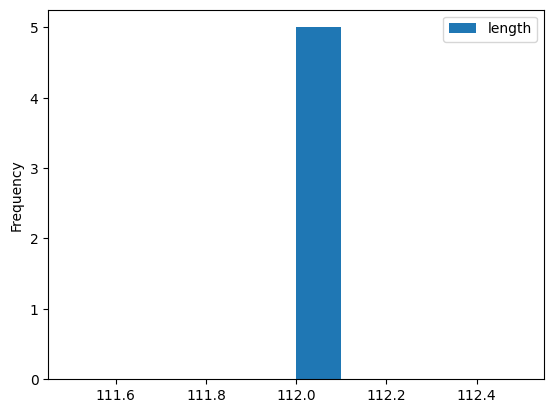

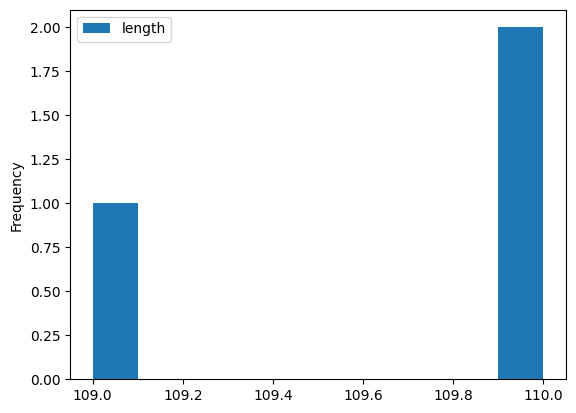

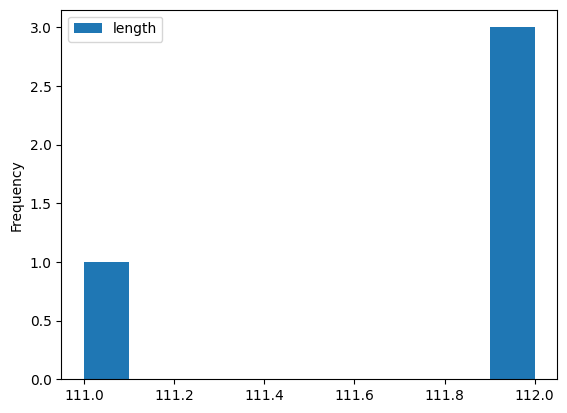

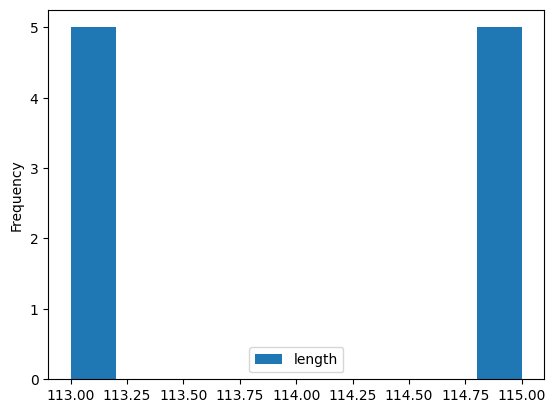

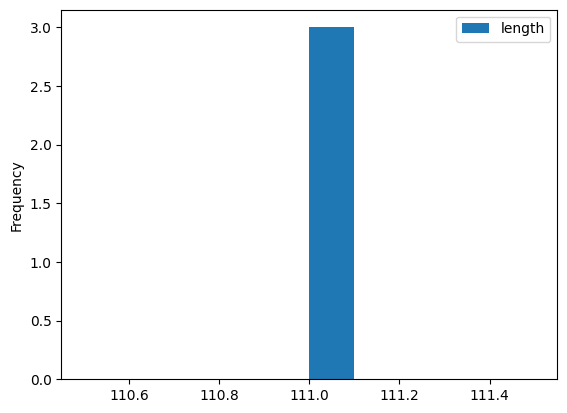

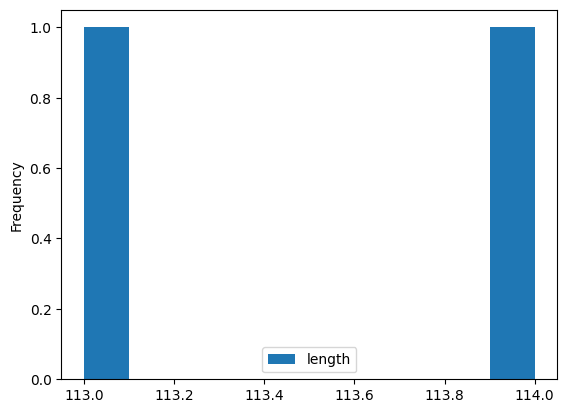

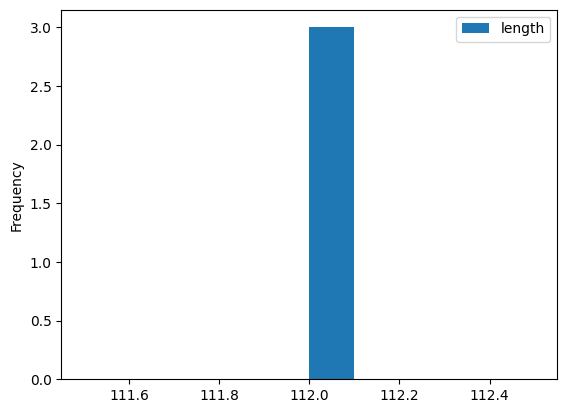

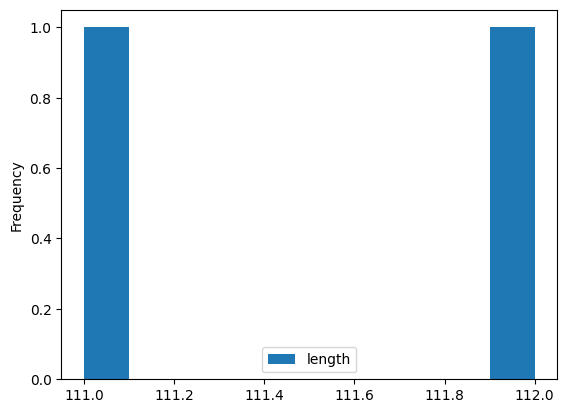

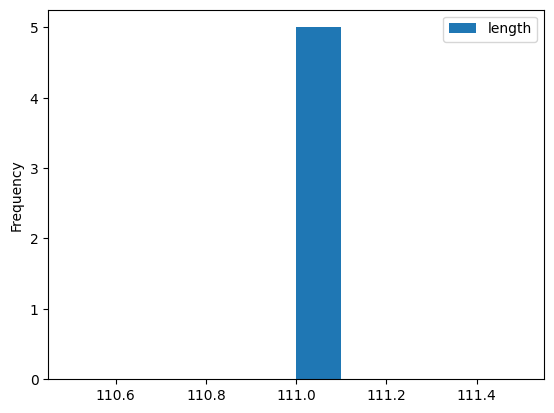

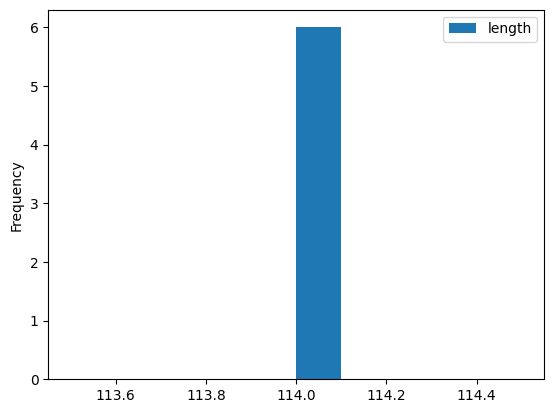

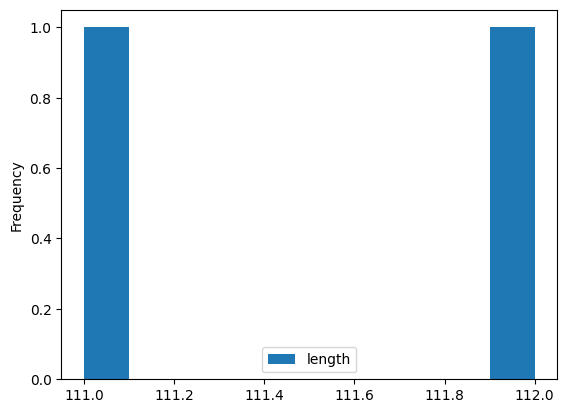

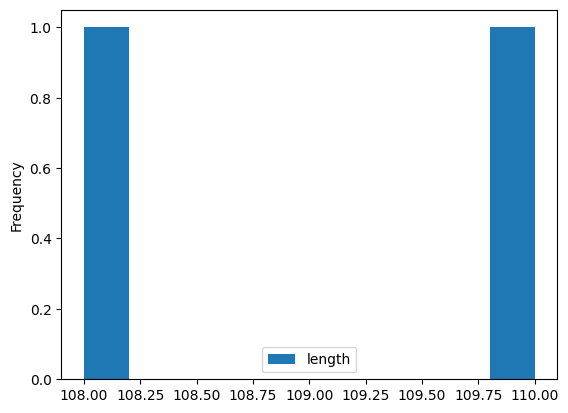

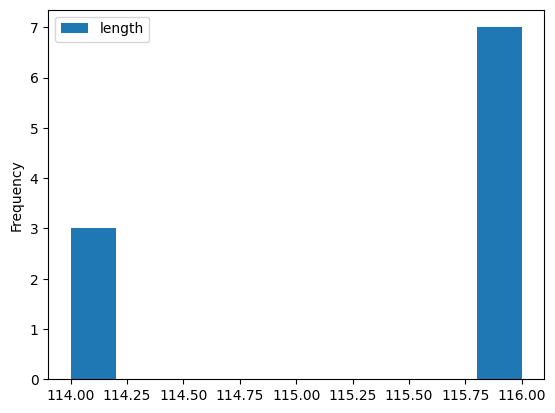

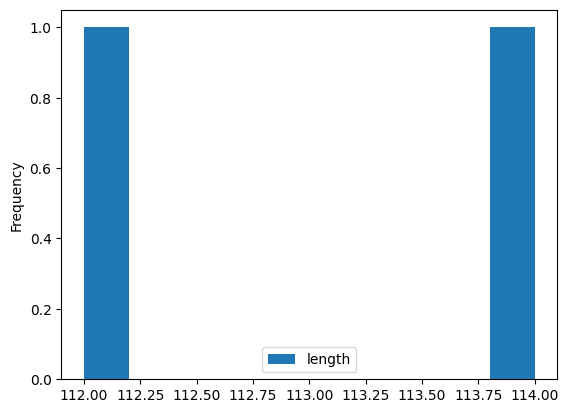

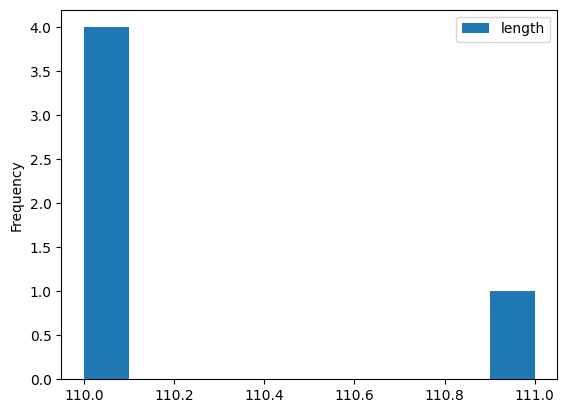

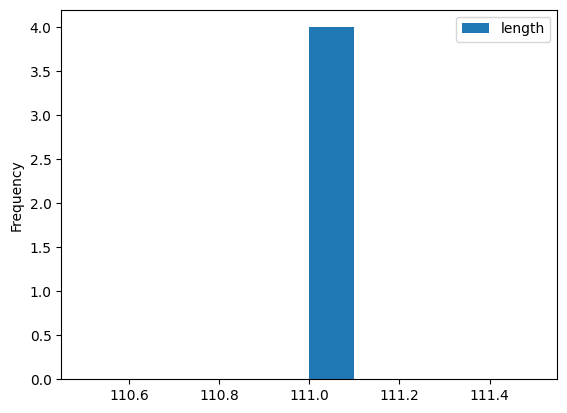

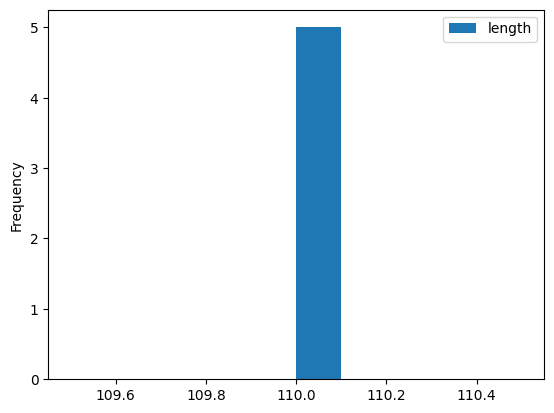

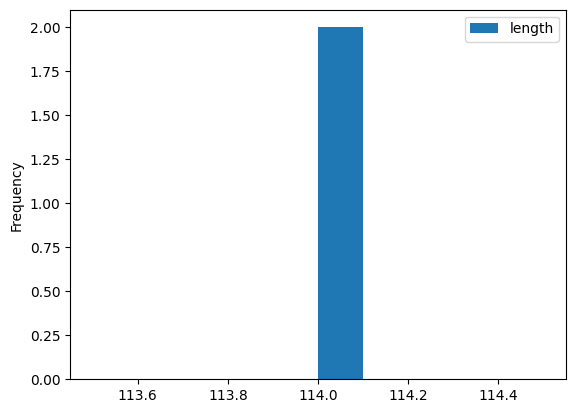

In [110]:
all_lengths.query("length_location == 'vbeta_length'").groupby('tcr_group').plot.hist()